In [28]:
# Standard stuff
import numpy as np
import pandas as pd

# imports for data transformation and model
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.cluster import KMeans

# viz libraries
import matplotlib.pyplot as plt

import os

In [29]:
df = pd.read_csv('./tracks.csv')

In [30]:
# start dropping useless columns
# TODO: regex release date into a usable feature
cleaned = df.drop(columns=['explicit','release_date'])

In [31]:
# for the time being we drop all the non-numerical data
# leave artists since we will encoded it 

numerical_only = cleaned.drop(columns=['id','name','id_artists'])
numerical_only.dtypes

popularity            int64
duration_ms           int64
artists              object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [24]:
# drop all the weird rows that have 0 or 1 time signatures
numerical_only.drop(numerical_only[(numerical_only['time_signature'] == 0) | (numerical_only['time_signature'] == 1)].index, inplace=True)
numerical_only['time_signature'].value_counts()

4    503808
3     64523
5     11400
Name: time_signature, dtype: int64

In [36]:
# scaler that only applies to the columns 
numerical_scaler = ColumnTransformer([('numerical_scaler', StandardScaler(), ['popularity','duration_ms','tempo']),
                                      ('be', BinaryEncoder(), ['artists'] )],
                                     remainder='passthrough')

C:\Users\16475\Anaconda3\envs\py376\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[-1.17415988, -0.81523311, -0.45739212, ...,  0.151     ,
         0.127     ,  3.        ],
       [-1.50076822, -1.0420877 , -0.55287633, ...,  0.148     ,
         0.655     ,  1.        ],
       [-1.50076822, -0.3826184 ,  0.40159623, ...,  0.212     ,
         0.457     ,  5.        ],
       ...,
       [ 2.30966248, -0.33550554,  0.89470735, ...,  0.0874    ,
         0.0663    ,  4.        ],
       [ 1.65644579, -0.69589003, -0.95537488, ...,  0.305     ,
         0.438     ,  4.        ],
       [ 0.5677513 , -0.12401538, -0.21034939, ...,  0.264     ,
         0.975     ,  4.        ]])

In [38]:
# create the data pipeline
pipe = make_pipeline(numerical_scaler, KMeans(n_clusters=5))

# fit pipeline 
pipe.fit(numerical_only)
pipe

C:\Users\16475\Anaconda3\envs\py376\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TypeError: score() missing 1 required positional argument: 'X'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      586672 non-null  float64
 1   energy            586672 non-null  float64
 2   key               586672 non-null  int64  
 3   loudness          586672 non-null  float64
 4   mode              586672 non-null  int64  
 5   speechiness       586672 non-null  float64
 6   acousticness      586672 non-null  float64
 7   instrumentalness  586672 non-null  float64
 8   liveness          586672 non-null  float64
 9   valence           586672 non-null  float64
 10  tempo             586672 non-null  float64
 11  time_signature    586672 non-null  int64  
 12  scaled_duration   586672 non-null  float64
 13  duration_ms       586672 non-null  float64
 14  popularity        586672 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 67.1 MB


In [ ]:

models = [KMeans(n_clusters=i).fit(numerical_only) for i in range(1,40)]
inertia = [model.inertia_ for model in models]

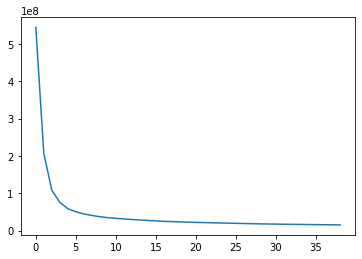

In [ ]:
plt.plot(inertia)